### Analise Covid 19 - Minhas Cidades

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\CS318041\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
covid19_casos_brasil = pd.read_csv('covid19_casos_brasil.csv')

In [61]:
covid19_casos_brasil.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [106]:
minhas_cidades = covid19_casos_brasil.loc[(covid19_casos_brasil['city'] == 'Osasco') | 
                                          (covid19_casos_brasil['city']  == 'Sorocaba') | 
                                          (covid19_casos_brasil['city']  == 'São Paulo')|
                                          (covid19_casos_brasil['city']  == 'Barueri')|
                                          (covid19_casos_brasil['city']  == 'Guarulhos')].reset_index()

minhas_cidades.head()

,index,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
2,4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0
3,6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0,0,4,city,SP,1,0
4,8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0,0,5,city,SP,0,0


In [107]:
minhas_cidades.describe()

,index,city_ibge_code,epidemiological_week,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,599.000000,5.990000e+02,599.000000,5.990000e+02,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,115070.472454,3.532625e+06,20.020033,3.427282e+06,11209.621035,276.409277,0.080744,742.908180,60.839733,293.951586,16.622705
std,109691.258050,1.794455e+04,5.066738,4.867773e+06,28864.122153,311.442259,0.048277,1702.703612,35.404746,731.629797,35.325309
min,0.000000,3.505708e+06,9.000000,2.741820e+05,1.000000,0.008160,0.000000,0.000000,1.000000,-25.000000,-1.000000
25%,15131.000000,3.518800e+06,16.000000,6.793780e+05,159.000000,18.027645,0.054050,13.000000,30.500000,6.000000,0.000000
50%,79993.000000,3.534401e+06,20.000000,6.984180e+05,1287.000000,148.907960,0.083800,109.000000,60.000000,40.000000,3.000000
75%,201825.500000,3.550308e+06,24.000000,1.379182e+06,4875.000000,474.904900,0.103900,424.000000,90.000000,142.000000,11.000000
max,353684.000000,3.552205e+06,29.000000,1.225202e+07,151365.000000,1235.428630,0.333300,8176.000000,139.000000,6877.000000,179.000000


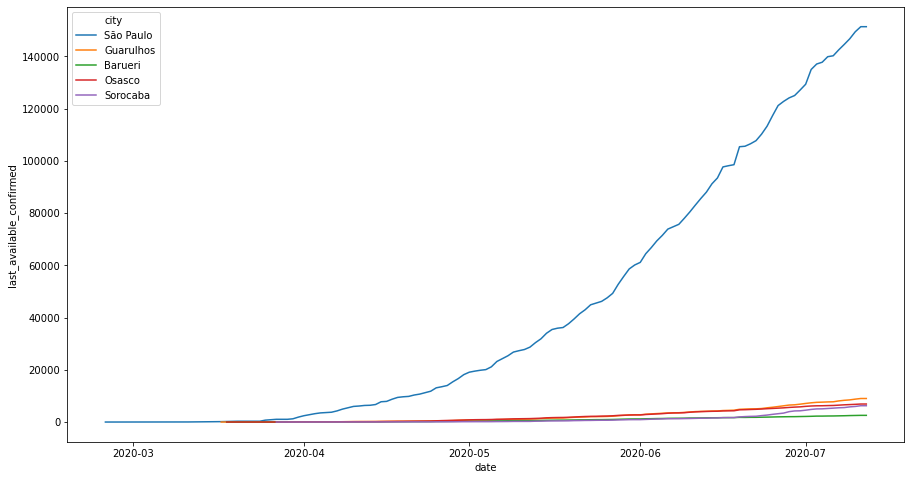

In [154]:
# Grafico de Linha cidades
minhas_cidades['date'] = pd.to_datetime(minhas_cidades['date'],format='%Y-%m-%d').dt.tz_localize(None)

total_covid = minhas_cidades.groupby([pd.Grouper(key='date', freq='D'),'city'])['last_available_confirmed'].sum().reset_index()

fig1, ax1 = plt.subplots(1,figsize=(15,8))
sns.lineplot(x="date", y="last_available_confirmed",hue="city",markers=True, dashes=False,data=total_covid)

plt.show()

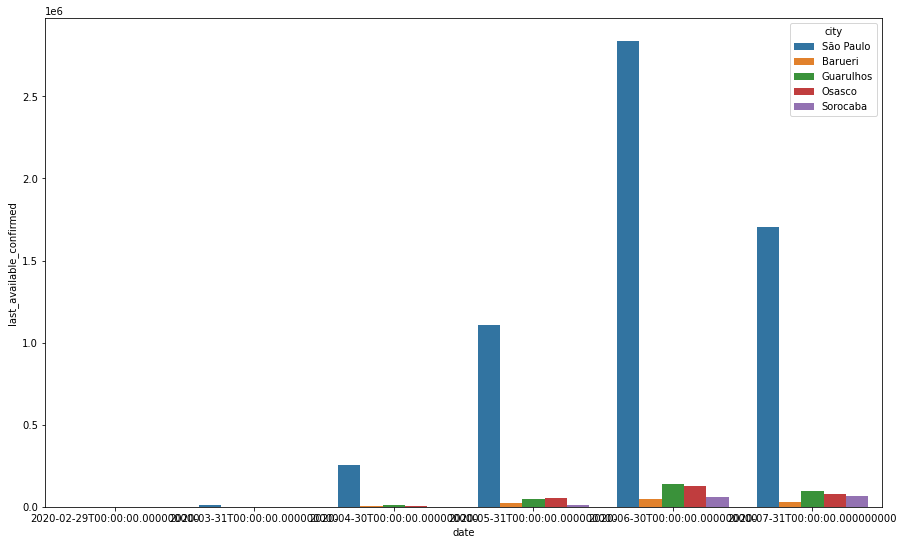

In [156]:
total_covid_M = minhas_cidades.groupby([pd.Grouper(key='date', freq='M'),'city'])['last_available_confirmed'].sum().reset_index()

fig1, ax1 = plt.subplots(1,figsize=(15,9))

sns.barplot(x="date", y="last_available_confirmed", hue="city",data=total_covid_M)

plt.show()

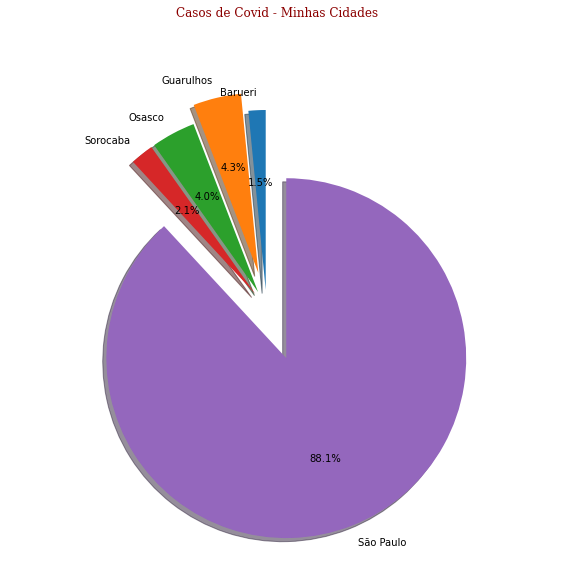

In [125]:
cases = minhas_cidades.groupby(['city']).agg(['sum'])['last_available_confirmed'].reset_index()

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


sizes = cases['sum']
labels = cases['city']
explode = (0.1, 0.2,0.1,0.1,0.3) 

fig1, ax1 = plt.subplots(1,figsize=(10,9))
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.suptitle('Casos de Covid - Minhas Cidades',fontdict=font)
#plt.title('Indica que a media de Px não é "diferente" de Py, pois o grau de confiança para afirmar o oposto é muito ruim')


plt.show()


In [127]:
Sorocaba = minhas_cidades.loc[minhas_cidades['city'] == 'Sorocaba']
Osasco = minhas_cidades.loc[minhas_cidades['city'] == 'Osasco']
SaoPaulo = minhas_cidades.loc[minhas_cidades['city'] == 'São Paulo']
Barueri = minhas_cidades.loc[minhas_cidades['city'] == 'Barueri']
Guarulhos = minhas_cidades.loc[minhas_cidades['city'] == 'Guarulhos']

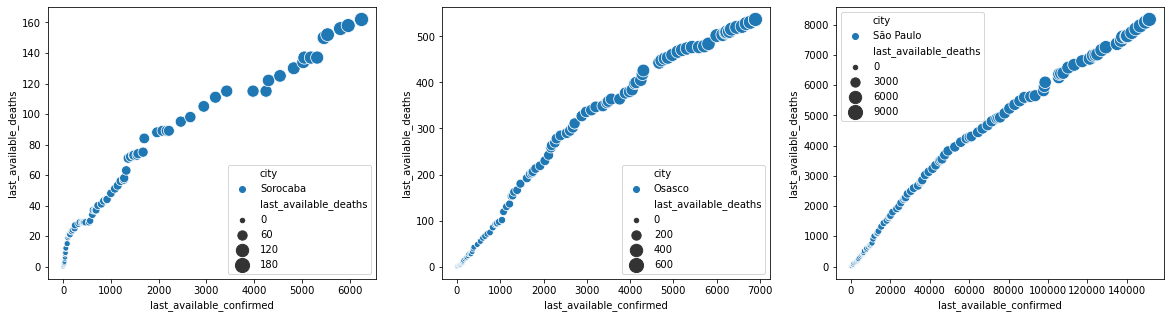

In [128]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.scatterplot(x="last_available_confirmed", y="last_available_deaths",
                hue="city",style="city",size="last_available_deaths",sizes=(20, 200),data=Sorocaba,ax=axes[0])

sns.scatterplot(x="last_available_confirmed", y="last_available_deaths",
                hue="city",size="last_available_deaths",sizes=(20, 200),data=Osasco, ax=axes[1])

sns.scatterplot(x="last_available_confirmed", y="last_available_deaths",
                hue="city",size="last_available_deaths",sizes=(20, 200),data=SaoPaulo, ax=axes[2])


plt.show()

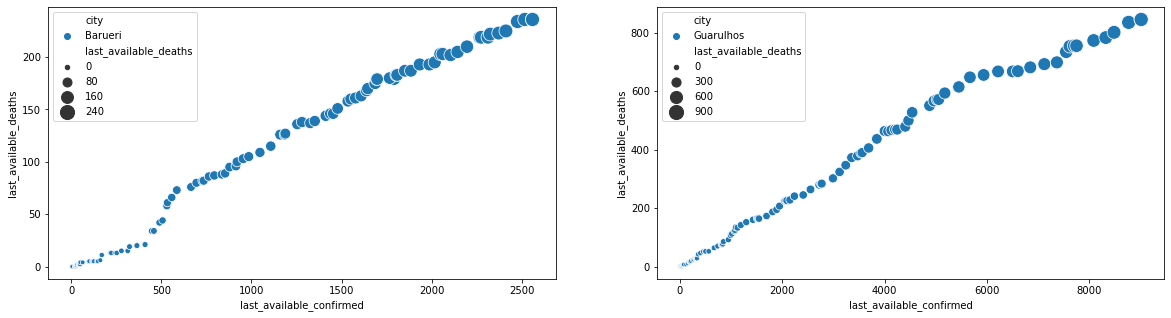

In [129]:
f, axes = plt.subplots(1, 2, figsize=(20,5))

sns.scatterplot(x="last_available_confirmed", y="last_available_deaths",
                hue="city",style="city",size="last_available_deaths",sizes=(20, 200),data=Barueri,ax=axes[0])

sns.scatterplot(x="last_available_confirmed", y="last_available_deaths",
                hue="city",size="last_available_deaths",sizes=(20, 200),data=Guarulhos, ax=axes[1])


plt.show()

In [130]:

pearsoncorr = minhas_cidades.corr(method='pearson')
pearsoncorr

,index,city_ibge_code,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
index,1.000000,-0.019008,0.950464,-0.079315,0.195067,-0.143610,0.384309,0.918914,0.029933,0.383174,0.926339,0.244581,0.175710
city_ibge_code,-0.019008,1.000000,-0.043820,0.547216,-0.001741,-0.014053,0.326276,0.006548,-0.052738,0.332614,0.043973,0.333437,0.344680
epidemiological_week,0.950464,-0.043820,1.000000,-0.142365,0.144620,-0.241398,0.360804,0.856834,0.168539,0.371976,0.953117,0.252849,0.206755
estimated_population_2019,-0.079315,0.547216,-0.142365,1.000000,-0.006992,0.031850,0.597259,0.114721,-0.268904,0.630633,0.142709,0.597848,0.658991
is_last,0.195067,-0.001741,0.144620,-0.006992,1.000000,-0.022855,0.076368,0.197342,-0.022717,0.067329,0.150322,0.028772,0.012418
is_repeated,-0.143610,-0.014053,-0.241398,0.031850,-0.022855,1.000000,-0.052513,-0.112296,-0.285962,-0.066439,-0.232666,-0.100171,-0.117320
last_available_confirmed,0.384309,0.326276,0.360804,0.597259,0.076368,-0.052513,1.000000,0.597742,-0.116656,0.992036,0.532626,0.772462,0.700963
last_available_confirmed_per_100k_inhabitants,0.918914,0.006548,0.856834,0.114721,0.197342,-0.112296,0.597742,1.000000,-0.005673,0.593176,0.902585,0.418116,0.338717
last_available_death_rate,0.029933,-0.052738,0.168539,-0.268904,-0.022717,-0.285962,-0.116656,-0.005673,1.000000,-0.098789,0.081863,-0.094294,-0.052566
last_available_deaths,0.383174,0.332614,0.371976,0.630633,0.067329,-0.066439,0.992036,0.593176,-0.098789,1.000000,0.555346,0.800458,0.751352


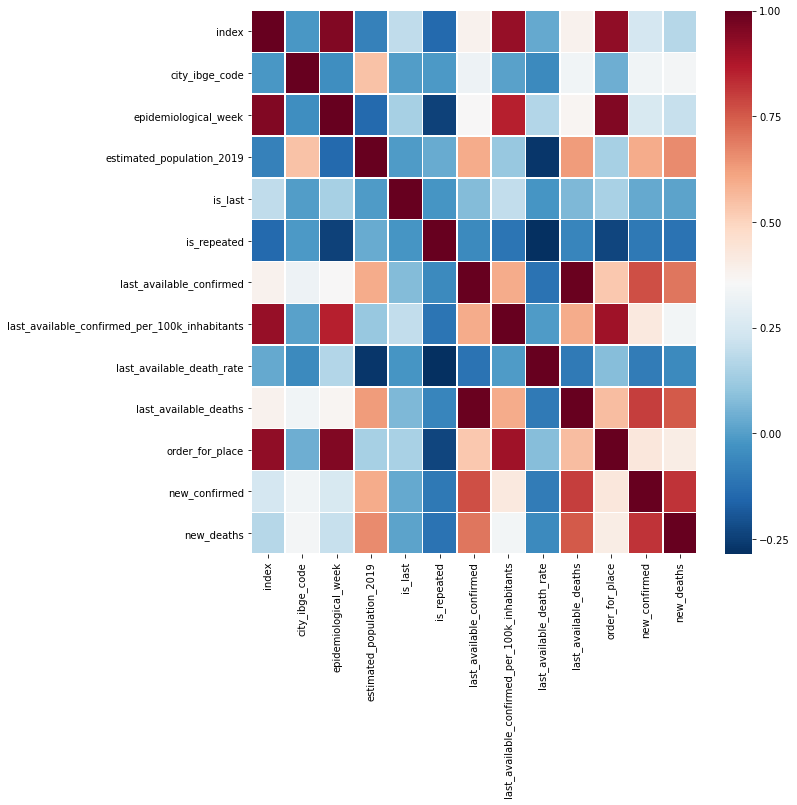

In [131]:
fig1, ax1 = plt.subplots(1,figsize=(10,10))
sns.heatmap(pearsoncorr,
            cmap='RdBu_r', 
            linewidths=.5)
plt.show()